In [1]:
import pandas as pd
data = []
with open('msr_paraphrase_train.txt', 'r') as file:
    # Skip the header line
    next(file)
    for line in file:
        split_line = line.strip().split('\t')
        if len(split_line) == 5:  # Assuming there should be 5 columns based on your example
            data.append(split_line)
        else:
            print(f"Skipping line due to incorrect number of columns: {line}")

columns = ["Quality", "#1 ID", "#2 ID", "#1 String", "#2 String"]
df = pd.DataFrame(data, columns=columns)

df.head()


,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


# 1. Data Investigation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quality    4076 non-null   object
 1   #1 ID      4076 non-null   object
 2   #2 ID      4076 non-null   object
 3   #1 String  4076 non-null   object
 4   #2 String  4076 non-null   object
dtypes: object(5)
memory usage: 159.3+ KB


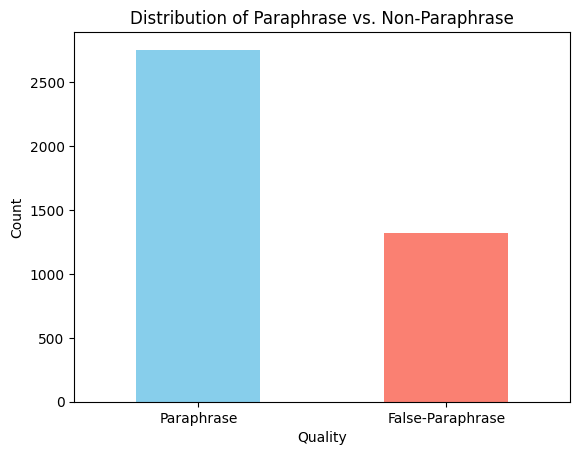

In [ ]:
import matplotlib.pyplot as plt
df['Quality'] = df['Quality'].astype(int)
# Distribution of paraphrase (1) vs. non-paraphrase (0)
df['Quality'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Paraphrase vs. Non-Paraphrase')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Paraphrase', 'False-Paraphrase'], rotation=0)
plt.show()


In [ ]:

paraphrase_examples = df[df['Quality'] == 1].sample(5)
non_paraphrase_examples = df[df['Quality'] == 0].sample(5)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set the display width to a larger value
pd.set_option('display.max_colwidth', None)  # Ensure full column content is shown

print("Paraphrase Examples:")
print(paraphrase_examples[['#1 String', '#2 String']])

print("\nNon-Paraphrase Examples:")
print(non_paraphrase_examples[['#1 String', '#2 String']])


Paraphrase Examples:
                                                                                                                                                                 #1 String                                                                                                                    #2 String
3685                                                                     It has been named Colymbosathon ecplecticos, which means "astounding swimmer with a large penis".                              He and colleagues named it Colymbosathon ecplecticos, which means "swimmer with a large penis."
315   Marisa Baldeo stated, however, the authority's official uniform policy says "they are not supposed to wear anything on their heads but a NYC transit depot logo cap.            "As of now, they are not supposed to wear anything on their heads but a NYC transit depot logo cap," Baldeo said.
455                      Earlier, they had defied a police order and cried "Allahu Akbar" (

In [ ]:
df['#1 Length'] = df['#1 String'].apply(lambda x: len(x.split()))
df['#2 Length'] = df['#2 String'].apply(lambda x: len(x.split()))

# Basic statistics for sentence lengths
length_stats = df[['#1 Length', '#2 Length']].describe()
length_stats


,#1 Length,#2 Length
count,4076.000000,4076.000000
mean,18.989696,18.932532
std,5.096458,5.086068
min,6.000000,6.000000
25%,15.000000,15.000000
50%,19.000000,19.000000
75%,23.000000,23.000000
max,30.000000,31.000000


# 2. EDA

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['#1 String Cleaned'] = df['#1 String'].apply(clean_text)
df['#2 String Cleaned'] = df['#2 String'].apply(clean_text)


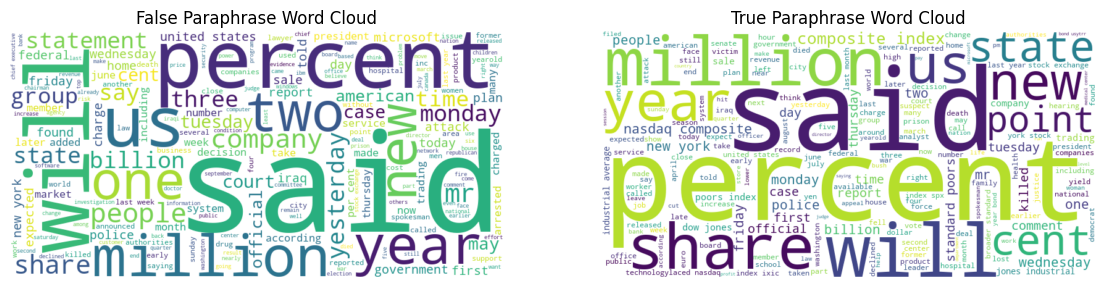

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


false_paraphrase_text = ' '.join(df[df['Quality'] == 1]['#1 String Cleaned']) + ' ' + ' '.join(df[df['Quality'] == 1]['#2 String Cleaned'])
true_paraphrase_text = ' '.join(df[df['Quality'] == 0]['#1 String Cleaned']) + ' ' + ' '.join(df[df['Quality'] == 0]['#2 String Cleaned'])

wordcloud_false_paraphrase = WordCloud(width=800, height=400, background_color='white').generate(false_paraphrase_text)
wordcloud_true_paraphrase = WordCloud(width=800, height=400, background_color='white').generate(true_paraphrase_text)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_false_paraphrase, interpolation='bilinear')
plt.title('False Paraphrase Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_true_paraphrase, interpolation='bilinear')
plt.title('True Paraphrase Word Cloud')
plt.axis('off')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

stop_words = set(stopwords.words('english'))


def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])


df['#1 String Cleaned No Stop'] = df['#1 String Cleaned'].apply(remove_stop_words)
df['#2 String Cleaned No Stop'] = df['#2 String Cleaned'].apply(remove_stop_words)


false_paraphrase_words_no_stop = ' '.join(df[df['Quality'] == 1]['#1 String Cleaned No Stop']) + ' ' + ' '.join(df[df['Quality'] == 1]['#2 String Cleaned No Stop'])
true_paraphrase_words_no_stop = ' '.join(df[df['Quality'] == 0]['#1 String Cleaned No Stop']) + ' ' + ' '.join(df[df['Quality'] == 0]['#2 String Cleaned No Stop'])

false_word_counts_no_stop = Counter(false_paraphrase_words_no_stop.split())
true_word_counts_no_stop = Counter(true_paraphrase_words_no_stop.split())

false_common_words = false_word_counts_no_stop.most_common(10)
true_common_words = true_word_counts_no_stop.most_common(10)


common_words_df = pd.DataFrame({
    'False Paraphrase Most Common Words': [word for word, count in false_common_words],
    'True Paraphrase Most Common Words': [word for word, count in true_common_words]
})
common_words_df


,False Paraphrase Most Common Words,True Paraphrase Most Common Words
0,said,said
1,percent,percent
2,us,points
3,two,index
4,new,million
5,would,new
6,also,also
7,million,us
8,last,year
9,year,nasdaq
